# Goal
Analyze the export performance of semiconductor products (specifically integrated circuits) by destination country to identify high-value markets and trends using trade data.

# Data Loading

| Column                                                 | Description                                                                                         |
| ------------------------------------------------------ | --------------------------------------------------------------------------------------------------- |
| **typeCode**                                           | Type of dataset (e.g., trade data category, usually 'C' for commodity)                              |
| **freqCode**                                           | Frequency of the data (usually annual or monthly)                                                   |
| **refPeriodId**, **refYear**, **refMonth**, **period** | Time indicators — useful for time-series analysis                                                   |
| **reporterCode**, **reporterISO**, **reporterDesc**    | Country that is reporting the trade (e.g., Taiwan)                                                  |
| **flowCode**, **flowDesc**                             | Type of trade: Import or Export                                                                     |
| **partnerCode**, **partnerISO**, **partnerDesc**       | Trade partner (who you're buying from or selling to)                                                |
| **cmdCode**                                            | HS (Harmonized System) commodity code — identifies the product (e.g., 8542 for ICs)                 |
| **cmdDesc**                                            | Product description (e.g., “Electronic integrated circuits”)                                        |
| **qty**, **netWgt**, **grossWgt**                      | Quantity and weight of traded goods (may be True/False if not filled correctly)                     |
| **fobvalue**                                           | **Free On Board** value — cost of goods at point of export (good for export-focused value)          |
| **cifvalue**                                           | **Cost, Insurance, and Freight** — includes shipping/import costs (useful for import-side analysis) |
| **motCode**, **motDesc**                               | Mode of transport (e.g., sea, air)                                                                  |
| **customsCode**, **customsDesc**                       | Customs declaration info                                                                            |
| **qtyUnitCode**, **qtyUnitAbbr**                       | Units of measurement (e.g., kg, pieces)                                                             |
| **isReported**                                         | Whether the data is officially reported (vs. estimated)                                             |

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.reset_option('display.max_rows')

In [65]:
df = pd.read_csv('TradeData_6_22_2025_11_47_42.csv', index_col=False, encoding='latin1')
df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,...,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,A,20200101,2020,52,2020,8,ALB,Albania,M,...,0.00,False,0.0,False,1961524.223,0.0,1961524.223,0,False,True
1,C,A,20200101,2020,52,2020,8,ALB,Albania,M,...,0.00,False,0.0,False,183993.896,0.0,183993.896,0,False,True
2,C,A,20200101,2020,52,2020,8,ALB,Albania,M,...,0.00,False,0.0,False,21676.351,0.0,21676.351,0,False,True
3,C,A,20200101,2020,52,2020,8,ALB,Albania,M,...,0.00,False,0.0,False,1647454.576,0.0,1647454.576,0,False,True
4,C,A,20200101,2020,52,2020,8,ALB,Albania,M,...,14.46,False,0.0,False,4554.309,0.0,4554.309,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66854,C,A,20240101,2024,52,2024,860,UZB,Uzbekistan,X,...,NaN,False,0.0,False,NaN,1852.0,1852.000,0,False,True
66855,C,A,20240101,2024,52,2024,860,UZB,Uzbekistan,X,...,NaN,False,0.0,False,NaN,46601.0,46601.000,2,False,True
66856,C,A,20240101,2024,52,2024,860,UZB,Uzbekistan,X,...,NaN,False,0.0,False,NaN,4279.0,4279.000,0,False,True
66857,C,A,20240101,2024,52,2024,860,UZB,Uzbekistan,X,...,NaN,False,0.0,False,NaN,225.0,225.000,0,False,True


# Data Understanding

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66859 entries, 0 to 66858
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   typeCode                  66859 non-null  object 
 1   freqCode                  66859 non-null  object 
 2   refPeriodId               66859 non-null  int64  
 3   refYear                   66859 non-null  int64  
 4   refMonth                  66859 non-null  int64  
 5   period                    66859 non-null  int64  
 6   reporterCode              66859 non-null  int64  
 7   reporterISO               66859 non-null  object 
 8   reporterDesc              66859 non-null  object 
 9   flowCode                  66859 non-null  object 
 10  flowDesc                  66859 non-null  object 
 11  partnerCode               66859 non-null  int64  
 12  partnerISO                66859 non-null  object 
 13  partnerDesc               66859 non-null  object 
 14  partne

We have 47 tables, but not all of them is useful

In [67]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

typeCode: 1 unique values
freqCode: 1 unique values
refPeriodId: 5 unique values
refYear: 5 unique values
refMonth: 1 unique values
period: 5 unique values
reporterCode: 169 unique values
reporterISO: 169 unique values
reporterDesc: 169 unique values
flowCode: 2 unique values
flowDesc: 2 unique values
partnerCode: 245 unique values
partnerISO: 244 unique values
partnerDesc: 245 unique values
partner2Code: 1 unique values
partner2ISO: 1 unique values
partner2Desc: 1 unique values
classificationCode: 4 unique values
classificationSearchCode: 1 unique values
isOriginalClassification: 1 unique values
cmdCode: 1 unique values
cmdDesc: 1 unique values
aggrLevel: 1 unique values
isLeaf: 1 unique values
customsCode: 1 unique values
customsDesc: 1 unique values
mosCode: 1 unique values
motCode: 1 unique values
motDesc: 1 unique values
qtyUnitCode: 3 unique values
qtyUnitAbbr: 2 unique values
qty: 8496 unique values
isQtyEstimated: 2 unique values
altQtyUnitCode: 4 unique values
altQtyUnitAbbr: 

In [68]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print(df[col].nunique())
    print("-" * 40)

Column: typeCode
['C']
1
----------------------------------------
Column: freqCode
['A']
1
----------------------------------------
Column: refPeriodId
[20200101 20210101 20220101 20230101 20240101]
5
----------------------------------------
Column: refYear
[2020 2021 2022 2023 2024]
5
----------------------------------------
Column: refMonth
[52]
1
----------------------------------------
Column: period
[2020 2021 2022 2023 2024]
5
----------------------------------------
Column: reporterCode
[  8  20  24  28  31  32  36  40  44  48  51  52  56  60  68  70  72  76
  84  96 100 104 108 112 116 120 124 132 136 140 144 152 156 170 174 178
 180 188 191 192 196 203 204 208 212 214 218 222 231 233 242 246 251 258
 266 268 270 275 276 296 300 308 320 328 340 344 348 352 360 364 372 376
 380 384 388 392 398 400 404 410 414 417 418 422 426 428 430 440 442 446
 450 454 458 462 470 478 480 484 490 496 498 499 500 504 508 512 516 524
 528 531 533 554 558 562 566 579 586 591 598 600 604 608 616 62

(reportercode, reporterdesc, partnercode, partnerdesc, refYear, refMonth, flowcode, flowdesc, cmdCode, cmdDesc, fobvalue, cifvalue, netWgt, grossWgt) Apparently these are the tables that is necessary for this analysis. First, need to copy the original data.

In [69]:
df_copy = df.copy()

In [70]:
# Keep only the necessary columns for analysis
columns_to_keep = [
    'reporterCode', 'reporterDesc', 'partnerCode', 'partnerDesc',
    'refYear', 'flowCode', 'flowDesc',
    'cmdCode', 'cmdDesc', 'qty', 'fobvalue', 'cifvalue', 'netWgt', 'grossWgt', 'primaryValue'
]
df_copy = df_copy[columns_to_keep]
df_copy.head()

,reporterCode,reporterDesc,partnerCode,partnerDesc,refYear,flowCode,flowDesc,cmdCode,cmdDesc,qty,fobvalue,cifvalue,netWgt,grossWgt,primaryValue
0,8,Albania,0,World,2020,M,Import,8542,Electronic integrated circuits,0.0,0.0,1961524.223,0.00,0.0,1961524.223
1,8,Albania,156,China,2020,M,Import,8542,Electronic integrated circuits,0.0,0.0,183993.896,0.00,0.0,183993.896
2,8,Albania,276,Germany,2020,M,Import,8542,Electronic integrated circuits,0.0,0.0,21676.351,0.00,0.0,21676.351
3,8,Albania,380,Italy,2020,M,Import,8542,Electronic integrated circuits,0.0,0.0,1647454.576,0.00,0.0,1647454.576
4,8,Albania,410,Rep. of Korea,2020,M,Import,8542,Electronic integrated circuits,18.0,0.0,4554.309,14.46,0.0,4554.309


In [71]:
# Split export data
df_copy_export = df_copy[df_copy['flowDesc'] == 'Export']

# Split import data
df_copy_import = df_copy[df_copy['flowDesc'] == 'Import']


In [72]:
df_copy_export.head()

,reporterCode,reporterDesc,partnerCode,partnerDesc,refYear,flowCode,flowDesc,cmdCode,cmdDesc,qty,fobvalue,cifvalue,netWgt,grossWgt,primaryValue
943,20,Andorra,0,World,2020,X,Export,8542,Electronic integrated circuits,0.0,3238989.065,NaN,1715.7,0.0,3238989.065
944,20,Andorra,251,France,2020,X,Export,8542,Electronic integrated circuits,0.0,330554.722,NaN,164.3,0.0,330554.722
945,20,Andorra,410,Rep. of Korea,2020,X,Export,8542,Electronic integrated circuits,0.0,23.151,NaN,0.5,0.0,23.151
946,20,Andorra,568,"Other Europe, nes",2020,X,Export,8542,Electronic integrated circuits,0.0,68309.326,NaN,43.0,0.0,68309.326
947,20,Andorra,579,Norway,2020,X,Export,8542,Electronic integrated circuits,0.0,91901.028,NaN,58.0,0.0,91901.028


In [73]:
df_copy_import.head()

,reporterCode,reporterDesc,partnerCode,partnerDesc,refYear,flowCode,flowDesc,cmdCode,cmdDesc,qty,fobvalue,cifvalue,netWgt,grossWgt,primaryValue
0,8,Albania,0,World,2020,M,Import,8542,Electronic integrated circuits,0.0,0.0,1961524.223,0.00,0.0,1961524.223
1,8,Albania,156,China,2020,M,Import,8542,Electronic integrated circuits,0.0,0.0,183993.896,0.00,0.0,183993.896
2,8,Albania,276,Germany,2020,M,Import,8542,Electronic integrated circuits,0.0,0.0,21676.351,0.00,0.0,21676.351
3,8,Albania,380,Italy,2020,M,Import,8542,Electronic integrated circuits,0.0,0.0,1647454.576,0.00,0.0,1647454.576
4,8,Albania,410,Rep. of Korea,2020,M,Import,8542,Electronic integrated circuits,18.0,0.0,4554.309,14.46,0.0,4554.309


# Data Cleaning (Handling Missing Values)

## Export

In [74]:
df_copy_export.describe()

,reporterCode,partnerCode,refYear,cmdCode,qty,fobvalue,cifvalue,netWgt,grossWgt,primaryValue
count,30469.000000,30469.000000,30469.000000,30469.0,3.046900e+04,3.046900e+04,8.105000e+03,2.702300e+04,3.046900e+04,3.046900e+04
mean,459.487840,433.695395,2021.927369,8542.0,2.992673e+05,3.001732e+08,6.691367e+04,1.419498e+05,1.045598e+04,3.001732e+08
std,248.405229,256.203464,1.371447,0.0,1.121424e+07,4.999778e+09,3.059687e+06,2.194341e+06,5.637530e+05,4.999778e+09
min,8.000000,0.000000,2020.000000,8542.0,0.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-02
25%,246.000000,212.000000,2021.000000,8542.0,0.000000e+00,4.339100e+03,0.000000e+00,6.000000e+00,0.000000e+00,4.339100e+03
50%,442.000000,428.000000,2022.000000,8542.0,0.000000e+00,5.188784e+04,0.000000e+00,1.010180e+02,0.000000e+00,5.188784e+04
75%,703.000000,674.000000,2023.000000,8542.0,0.000000e+00,1.374973e+06,0.000000e+00,2.388971e+03,0.000000e+00,1.374973e+06
max,894.000000,899.000000,2024.000000,8542.0,1.241091e+09,2.197973e+11,1.703608e+08,1.334324e+08,8.502139e+07,2.197973e+11


In [75]:
df_copy_export.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30469 entries, 943 to 66858
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reporterCode  30469 non-null  int64  
 1   reporterDesc  30469 non-null  object 
 2   partnerCode   30469 non-null  int64  
 3   partnerDesc   30469 non-null  object 
 4   refYear       30469 non-null  int64  
 5   flowCode      30469 non-null  object 
 6   flowDesc      30469 non-null  object 
 7   cmdCode       30469 non-null  int64  
 8   cmdDesc       30469 non-null  object 
 9   qty           30469 non-null  float64
 10  fobvalue      30469 non-null  float64
 11  cifvalue      8105 non-null   float64
 12  netWgt        27023 non-null  float64
 13  grossWgt      30469 non-null  float64
 14  primaryValue  30469 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 3.7+ MB


In [76]:
df_copy_export.isnull().sum()

reporterCode        0
reporterDesc        0
partnerCode         0
partnerDesc         0
refYear             0
flowCode            0
flowDesc            0
cmdCode             0
cmdDesc             0
qty                 0
fobvalue            0
cifvalue        22364
netWgt           3446
grossWgt            0
primaryValue        0
dtype: int64

In [77]:
df_copy_export[df_copy_export.isna().any(axis=1)]

,reporterCode,reporterDesc,partnerCode,partnerDesc,refYear,flowCode,flowDesc,cmdCode,cmdDesc,qty,fobvalue,cifvalue,netWgt,grossWgt,primaryValue
943,20,Andorra,0,World,2020,X,Export,8542,Electronic integrated circuits,0.0,3238989.065,NaN,1715.7,0.0,3238989.065
944,20,Andorra,251,France,2020,X,Export,8542,Electronic integrated circuits,0.0,330554.722,NaN,164.3,0.0,330554.722
945,20,Andorra,410,Rep. of Korea,2020,X,Export,8542,Electronic integrated circuits,0.0,23.151,NaN,0.5,0.0,23.151
946,20,Andorra,568,"Other Europe, nes",2020,X,Export,8542,Electronic integrated circuits,0.0,68309.326,NaN,43.0,0.0,68309.326
947,20,Andorra,579,Norway,2020,X,Export,8542,Electronic integrated circuits,0.0,91901.028,NaN,58.0,0.0,91901.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66854,860,Uzbekistan,616,Poland,2024,X,Export,8542,Electronic integrated circuits,3075.0,1852.000,NaN,NaN,0.0,1852.000
66855,860,Uzbekistan,724,Spain,2024,X,Export,8542,Electronic integrated circuits,0.0,46601.000,NaN,NaN,0.0,46601.000
66856,860,Uzbekistan,762,Tajikistan,2024,X,Export,8542,Electronic integrated circuits,151.0,4279.000,NaN,NaN,0.0,4279.000
66857,860,Uzbekistan,804,Ukraine,2024,X,Export,8542,Electronic integrated circuits,6.0,225.000,NaN,NaN,0.0,225.000


In [78]:
check = df_copy_export[df_copy_export['netWgt'].isna()]
check.sample(10)

,reporterCode,reporterDesc,partnerCode,partnerDesc,refYear,flowCode,flowDesc,cmdCode,cmdDesc,qty,fobvalue,cifvalue,netWgt,grossWgt,primaryValue
34995,376,Israel,116,Cambodia,2022,X,Export,8542,Electronic integrated circuits,0.0,2000.000,NaN,NaN,0.000,2000.000
44983,124,Canada,716,Zimbabwe,2023,X,Export,8542,Electronic integrated circuits,0.0,7308.643,NaN,NaN,0.000,7308.643
57222,36,Australia,598,Papua New Guinea,2024,X,Export,8542,Electronic integrated circuits,0.0,650855.424,NaN,NaN,28.738,650855.424
61708,376,Israel,591,Panama,2024,X,Export,8542,Electronic integrated circuits,0.0,1000.000,NaN,NaN,0.000,1000.000
1372,76,Brazil,218,Ecuador,2020,X,Export,8542,Electronic integrated circuits,1459.0,81492.000,NaN,NaN,0.000,81492.000
38059,608,Philippines,581,United States Minor Outlying Islands,2022,X,Export,8542,Electronic integrated circuits,0.0,6595765.000,NaN,NaN,2740.040,6595765.000
53711,704,Viet Nam,144,Sri Lanka,2023,X,Export,8542,Electronic integrated circuits,0.0,43733.600,NaN,NaN,0.000,43733.600
61958,392,Japan,800,Uganda,2024,X,Export,8542,Electronic integrated circuits,241.0,4043.172,NaN,NaN,0.000,4043.172
51994,554,New Zealand,96,Brunei Darussalam,2023,X,Export,8542,Electronic integrated circuits,2.0,1228.174,NaN,NaN,2.000,1228.174
4854,344,"China, Hong Kong SAR",527,"Oceania, nes",2020,X,Export,8542,Electronic integrated circuits,5000.0,1438.658,NaN,NaN,0.000,1438.658


In [79]:
# Calculate and display the percentage of missing values for each column in df_copy
percent_missing = df_copy_export.isna().mean() * 100
print(percent_missing)

reporterCode     0.000000
reporterDesc     0.000000
partnerCode      0.000000
partnerDesc      0.000000
refYear          0.000000
flowCode         0.000000
flowDesc         0.000000
cmdCode          0.000000
cmdDesc          0.000000
qty              0.000000
fobvalue         0.000000
cifvalue        73.399193
netWgt          11.309856
grossWgt         0.000000
primaryValue     0.000000
dtype: float64


we don't need 'cifvalue' in here. ('fobvalue' is a cost of goods at point of export, while 'cifvalue' is a shipping/import costs).

In [80]:
# Check for zero values in selected columns of df_copy_export
zero_counts = df_copy_export.apply(lambda x: (x == 0).sum())
print(zero_counts)

reporterCode        0
reporterDesc        0
partnerCode       661
partnerDesc         0
refYear             0
flowCode            0
flowDesc            0
cmdCode             0
cmdDesc             0
qty             23336
fobvalue            0
cifvalue         8006
netWgt           1627
grossWgt        29395
primaryValue        0
dtype: int64


In [81]:
# Fill missing values in 'netWgt' with the median of the column
median_netWgt = df_copy_export['netWgt'].median()
df_copy_export['netWgt'] = df_copy_export['netWgt'].fillna(median_netWgt)
df_copy_export['netWgt'] = df_copy_export['netWgt'].replace(0, median_netWgt)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\4171613757.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_export['netWgt'] = df_copy_export['netWgt'].fillna(median_netWgt)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\4171613757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_export['netWgt'] = df_copy_export['netWgt'].replace(0, median_netWgt)


In [82]:
df_export = df_copy_export.drop(columns=['cifvalue'])

In [83]:
# check again
percent_missing_check = df_export.isna().mean() * 100
percent_missing_check

reporterCode    0.0
reporterDesc    0.0
partnerCode     0.0
partnerDesc     0.0
refYear         0.0
flowCode        0.0
flowDesc        0.0
cmdCode         0.0
cmdDesc         0.0
qty             0.0
fobvalue        0.0
netWgt          0.0
grossWgt        0.0
primaryValue    0.0
dtype: float64

In [84]:
#check again
zero_counts = df_export.apply(lambda x: (x == 0).sum())
print(zero_counts)

reporterCode        0
reporterDesc        0
partnerCode       661
partnerDesc         0
refYear             0
flowCode            0
flowDesc            0
cmdCode             0
cmdDesc             0
qty             23336
fobvalue            0
netWgt              0
grossWgt        29395
primaryValue        0
dtype: int64


Since we use 'netWgt' the most, we will drop the 'grossWgt' and 'primaryvalue'

In [85]:
df_export.drop(columns=['grossWgt', 'primaryValue'], inplace=True)

In [86]:
df_export = df_export.reset_index(drop=True)
df_export.head()

,reporterCode,reporterDesc,partnerCode,partnerDesc,refYear,flowCode,flowDesc,cmdCode,cmdDesc,qty,fobvalue,netWgt
0,20,Andorra,0,World,2020,X,Export,8542,Electronic integrated circuits,0.0,3238989.065,1715.7
1,20,Andorra,251,France,2020,X,Export,8542,Electronic integrated circuits,0.0,330554.722,164.3
2,20,Andorra,410,Rep. of Korea,2020,X,Export,8542,Electronic integrated circuits,0.0,23.151,0.5
3,20,Andorra,568,"Other Europe, nes",2020,X,Export,8542,Electronic integrated circuits,0.0,68309.326,43.0
4,20,Andorra,579,Norway,2020,X,Export,8542,Electronic integrated circuits,0.0,91901.028,58.0


In [87]:
# Check rows where reporterCode is 0 in the check DataFrame
df_export[df_export['partnerCode'] == 0]

,reporterCode,reporterDesc,partnerCode,partnerDesc,refYear,flowCode,flowDesc,cmdCode,cmdDesc,qty,fobvalue,netWgt
0,20,Andorra,0,World,2020,X,Export,8542,Electronic integrated circuits,0.0,3.238989e+06,1715.700
7,24,Angola,0,World,2020,X,Export,8542,Electronic integrated circuits,0.0,4.667772e+04,101.018
25,31,Azerbaijan,0,World,2020,X,Export,8542,Electronic integrated circuits,173.0,5.618599e+04,96.943
32,32,Argentina,0,World,2020,X,Export,8542,Electronic integrated circuits,90951.0,4.647518e+05,814.880
38,36,Australia,0,World,2020,X,Export,8542,Electronic integrated circuits,0.0,5.923016e+07,101.018
...,...,...,...,...,...,...,...,...,...,...,...,...
30133,818,Egypt,0,World,2024,X,Export,8542,Electronic integrated circuits,0.0,8.383422e+06,101.018
30152,826,United Kingdom,0,World,2024,X,Export,8542,Electronic integrated circuits,0.0,1.029149e+09,2302289.779
30292,842,USA,0,World,2024,X,Export,8542,Electronic integrated circuits,0.0,5.063452e+10,101.018
30451,854,Burkina Faso,0,World,2024,X,Export,8542,Electronic integrated circuits,0.0,1.519887e+04,62.000


In [88]:
partner_counts = df_export['partnerDesc'].value_counts().reset_index()
partner_counts.columns = ['Country', 'Count']
partner_counts

,Country,Count
0,World,661
1,USA,444
2,Netherlands,384
3,Germany,383
4,France,363
...,...,...
239,Tokelau,3
240,Antarctica,2
241,Bouvet Island,2
242,South Georgia and the South Sandwich Islands,1


## Import (In case we need it)

In [89]:
df_copy_import.describe()

,reporterCode,partnerCode,refYear,cmdCode,qty,fobvalue,cifvalue,netWgt,grossWgt,primaryValue
count,36390.000000,36390.000000,36390.000000,36390.0,3.639000e+04,1.616700e+04,3.521000e+04,3.410600e+04,3.639000e+04,3.639000e+04
mean,440.194312,446.472767,2021.868728,8542.0,5.227377e+05,4.661523e+07,3.012374e+08,1.716704e+05,4.619603e+03,2.984760e+08
std,250.284623,252.078312,1.352186,0.0,1.794896e+07,7.897625e+08,6.078284e+09,2.662959e+06,2.141261e+05,5.986238e+09
min,8.000000,0.000000,2020.000000,8542.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.900000e-02
25%,218.000000,231.000000,2021.000000,8542.0,0.000000e+00,0.000000e+00,2.292552e+03,3.770000e+00,0.000000e+00,2.391753e+03
50%,428.000000,446.000000,2022.000000,8542.0,0.000000e+00,0.000000e+00,2.835366e+04,5.500000e+01,0.000000e+00,2.995767e+04
75%,688.000000,699.000000,2023.000000,8542.0,2.000000e+00,2.692151e+04,7.145499e+05,1.403750e+03,0.000000e+00,7.587262e+05
max,894.000000,899.000000,2024.000000,8542.0,1.892485e+09,4.340121e+10,4.326337e+11,2.704991e+08,2.012242e+07,4.326337e+11


In [90]:
df_copy_import.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36390 entries, 0 to 66325
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reporterCode  36390 non-null  int64  
 1   reporterDesc  36390 non-null  object 
 2   partnerCode   36390 non-null  int64  
 3   partnerDesc   36390 non-null  object 
 4   refYear       36390 non-null  int64  
 5   flowCode      36390 non-null  object 
 6   flowDesc      36390 non-null  object 
 7   cmdCode       36390 non-null  int64  
 8   cmdDesc       36390 non-null  object 
 9   qty           36390 non-null  float64
 10  fobvalue      16167 non-null  float64
 11  cifvalue      35210 non-null  float64
 12  netWgt        34106 non-null  float64
 13  grossWgt      36390 non-null  float64
 14  primaryValue  36390 non-null  float64
dtypes: float64(6), int64(4), object(5)
memory usage: 4.4+ MB


In [91]:
df_copy_import.isnull().sum()

reporterCode        0
reporterDesc        0
partnerCode         0
partnerDesc         0
refYear             0
flowCode            0
flowDesc            0
cmdCode             0
cmdDesc             0
qty                 0
fobvalue        20223
cifvalue         1180
netWgt           2284
grossWgt            0
primaryValue        0
dtype: int64

In [92]:
# Check for zero values in selected columns of df_copy_import
zero_counts = df_copy_import.apply(lambda x: (x == 0).sum())
print(zero_counts)

reporterCode        0
reporterDesc        0
partnerCode       734
partnerDesc         0
refYear             0
flowCode            0
flowDesc            0
cmdCode             0
cmdDesc             0
qty             26109
fobvalue         8183
cifvalue          199
netWgt           1348
grossWgt        35495
primaryValue        0
dtype: int64


In [93]:
# Fill missing values in 'netWgt' with the median of the column
median_netWgt = df_copy_import['netWgt'].median()
df_copy_import['netWgt'] = df_copy_import['netWgt'].fillna(median_netWgt)
df_copy_import['netWgt'] = df_copy_import['netWgt'].replace(0, median_netWgt)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\1940052531.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_import['netWgt'] = df_copy_import['netWgt'].fillna(median_netWgt)
C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\1940052531.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_import['netWgt'] = df_copy_import['netWgt'].replace(0, median_netWgt)


In [94]:
median_cifvalue = df_copy_import['cifvalue'].median()
df_copy_import['cifvalue'] = df_copy_import['cifvalue'].replace(0, median_cifvalue)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11244\1152221904.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy_import['cifvalue'] = df_copy_import['cifvalue'].replace(0, median_cifvalue)


In [95]:
df_import = df_copy_import.drop(columns=['fobvalue', 'grossWgt', 'primaryValue'])

In [96]:
# check again
percent_missing_check = df_import.isna().mean() * 100
percent_missing_check

reporterCode    0.000000
reporterDesc    0.000000
partnerCode     0.000000
partnerDesc     0.000000
refYear         0.000000
flowCode        0.000000
flowDesc        0.000000
cmdCode         0.000000
cmdDesc         0.000000
qty             0.000000
cifvalue        3.242649
netWgt          0.000000
dtype: float64

In [97]:
#check again
zero_counts = df_import.apply(lambda x: (x == 0).sum())
print(zero_counts)

reporterCode        0
reporterDesc        0
partnerCode       734
partnerDesc         0
refYear             0
flowCode            0
flowDesc            0
cmdCode             0
cmdDesc             0
qty             26109
cifvalue            0
netWgt              0
dtype: int64


In [98]:
df_import.head()

,reporterCode,reporterDesc,partnerCode,partnerDesc,refYear,flowCode,flowDesc,cmdCode,cmdDesc,qty,cifvalue,netWgt
0,8,Albania,0,World,2020,M,Import,8542,Electronic integrated circuits,0.0,1961524.223,55.00
1,8,Albania,156,China,2020,M,Import,8542,Electronic integrated circuits,0.0,183993.896,55.00
2,8,Albania,276,Germany,2020,M,Import,8542,Electronic integrated circuits,0.0,21676.351,55.00
3,8,Albania,380,Italy,2020,M,Import,8542,Electronic integrated circuits,0.0,1647454.576,55.00
4,8,Albania,410,Rep. of Korea,2020,M,Import,8542,Electronic integrated circuits,18.0,4554.309,14.46


In [99]:
partner_counts = df_import['partnerDesc'].value_counts().reset_index()
partner_counts.columns = ['Country', 'Count']
total = partner_counts['Count'].sum()
print(f"Total: {total}")
partner_counts

Total: 36390


,Country,Count
0,World,734
1,China,709
2,USA,693
3,Germany,647
4,United Kingdom,636
...,...,...
240,"North America and Central America, nes",2
241,Bonaire,2
242,"Rest of America, nes",1
243,Heard Island and McDonald Islands,1


### Unique Findings !!
#### Exporters

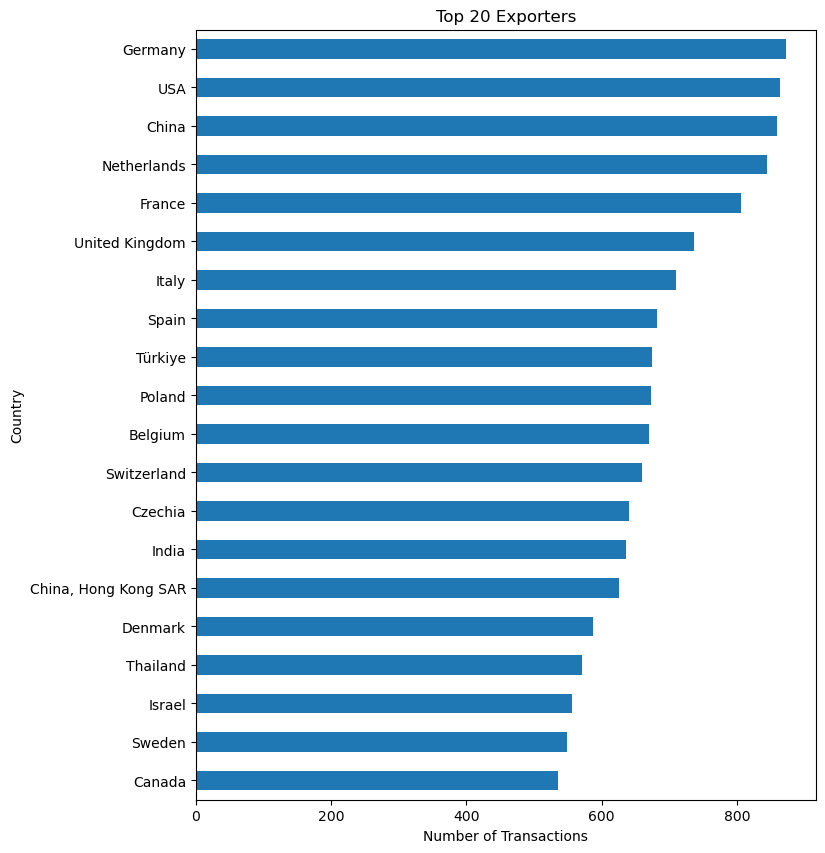

In [100]:
# From df_export
df_export['reporterDesc'].value_counts().head(20).plot(kind='barh', figsize=(8, 10))
plt.title("Top 20 Exporters")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()

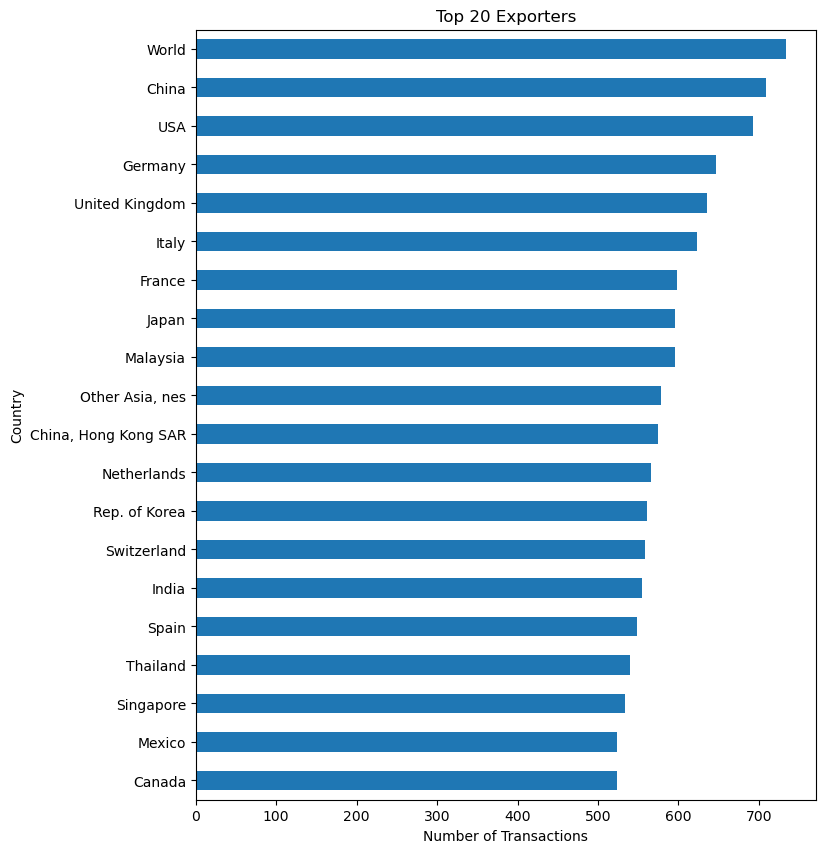

In [101]:
# From df_import
df_import['partnerDesc'].value_counts().head(20).plot(kind='barh', figsize=(8, 10))
plt.title("Top 20 Exporters")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()

#### Importers

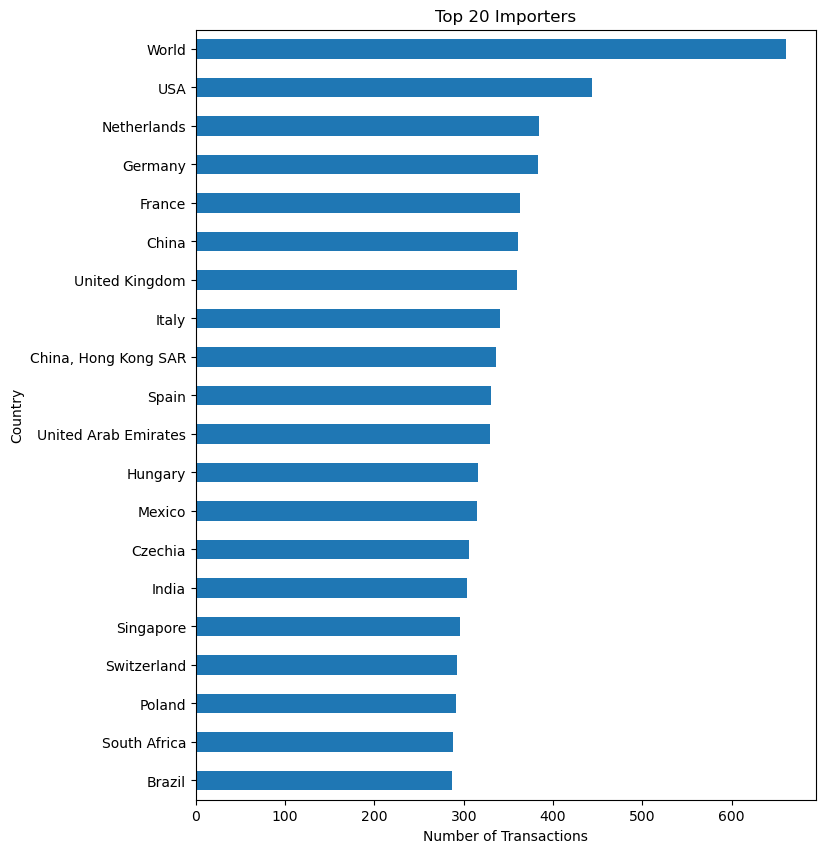

In [102]:
# From df_export
df_export['partnerDesc'].value_counts().head(20).plot(kind='barh', figsize=(8, 10))
plt.title("Top 20 Importers")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()

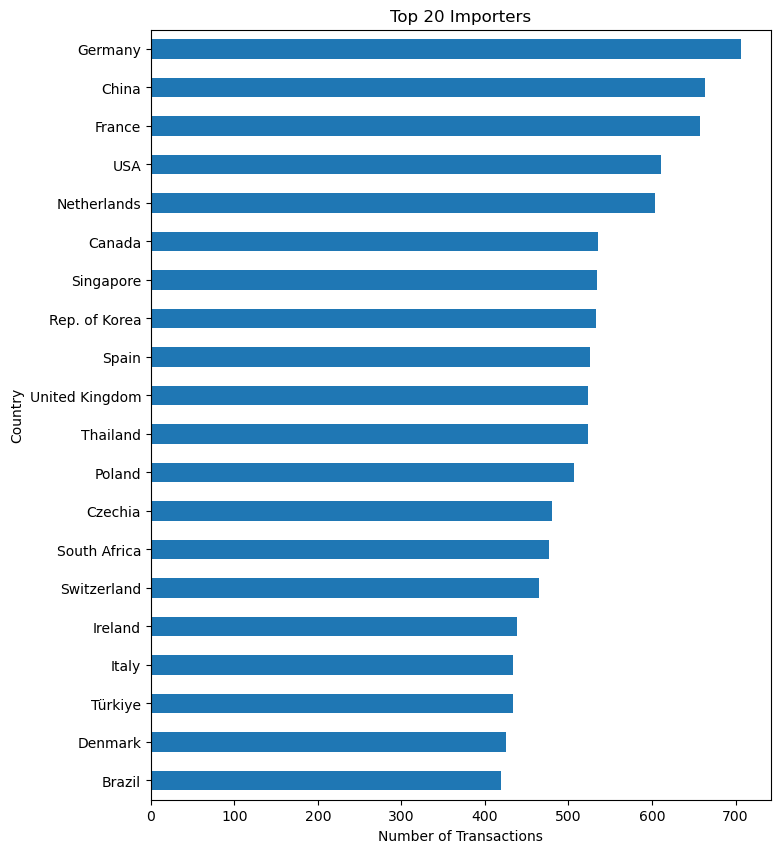

In [103]:
# From df_import
df_import['reporterDesc'].value_counts().head(20).plot(kind='barh', figsize=(8, 10))
plt.title("Top 20 Importers")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.gca().invert_yaxis()
plt.show()

#### Insight:
We can take a data either import or export from both export report or import report. However, we will have some aggregation data from the opposite report such as taking an export data from import report which exporter will be as 'partner' and the 'reporter' will be the import country. The reporter somehow create a aggregation data such as 'World' as their 'partner'. So we have to focus on the 'reporter' only to avoid aggregation data.

# Outlier Check

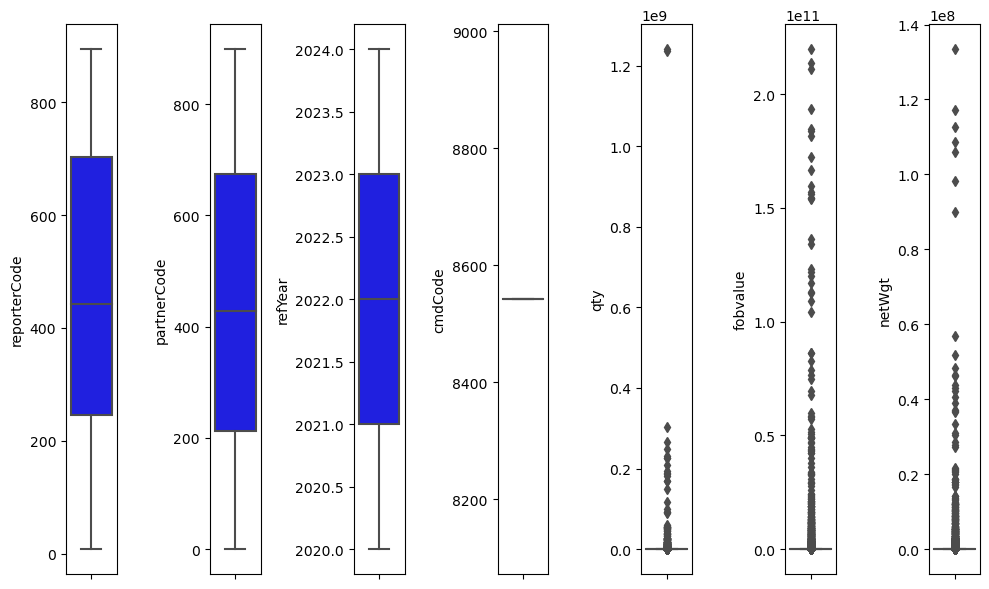

In [104]:
# Check outliers
numerical_columns = df_export.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(10, 6))
for i in range(0, len(numerical_columns)):
    plt.subplot(1,len(numerical_columns), i+1)
    sns.boxplot(y=df_export[numerical_columns[i]], color='blue')
    plt.tight_layout()

Since the operations value is the part that has outliers, we will keep the outliers, to keep the original information.

# Export Data for PBI uses

In [105]:
df_export.to_excel('df_export.xlsx', index=False)

In [106]:
df_import.to_excel('df_import.xlsx', index=False)

## Data of the quantity

In [107]:
zero_counts = df_export.apply(lambda x: (x == 0).sum())
print(zero_counts)

reporterCode        0
reporterDesc        0
partnerCode       661
partnerDesc         0
refYear             0
flowCode            0
flowDesc            0
cmdCode             0
cmdDesc             0
qty             23336
fobvalue            0
netWgt              0
dtype: int64


In [108]:
# Drop rows where 'qty' is zero in df_export
df_export_qty = df_export[df_export['qty'] != 0].reset_index(drop=True)
df_export_qty.head()

,reporterCode,reporterDesc,partnerCode,partnerDesc,refYear,flowCode,flowDesc,cmdCode,cmdDesc,qty,fobvalue,netWgt
0,24,Angola,192,Cuba,2020,X,Export,8542,Electronic integrated circuits,10.00,29.528,10.000
1,24,Angola,380,Italy,2020,X,Export,8542,Electronic integrated circuits,3.00,1166.118,3.000
2,24,Angola,710,South Africa,2020,X,Export,8542,Electronic integrated circuits,196.26,1200.373,196.260
3,31,Azerbaijan,0,World,2020,X,Export,8542,Electronic integrated circuits,173.00,56185.990,96.943
4,31,Azerbaijan,56,Belgium,2020,X,Export,8542,Electronic integrated circuits,7.00,2642.960,39.500


In [109]:
zero_counts = df_export_qty.apply(lambda x: (x == 0).sum())
print(zero_counts)

reporterCode     0
reporterDesc     0
partnerCode     73
partnerDesc      0
refYear          0
flowCode         0
flowDesc         0
cmdCode          0
cmdDesc          0
qty              0
fobvalue         0
netWgt           0
dtype: int64


In [110]:
df_export_qty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7133 entries, 0 to 7132
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   reporterCode  7133 non-null   int64  
 1   reporterDesc  7133 non-null   object 
 2   partnerCode   7133 non-null   int64  
 3   partnerDesc   7133 non-null   object 
 4   refYear       7133 non-null   int64  
 5   flowCode      7133 non-null   object 
 6   flowDesc      7133 non-null   object 
 7   cmdCode       7133 non-null   int64  
 8   cmdDesc       7133 non-null   object 
 9   qty           7133 non-null   float64
 10  fobvalue      7133 non-null   float64
 11  netWgt        7133 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 668.8+ KB


In [111]:
df_export_qty.to_excel('df_export_qty.xlsx', index=False)

# Data Manipulation

In [112]:
# Select only columns with float or int data types from df_copy_clean
numeric_df = df_export.select_dtypes(include=['float64', 'int64'])
numeric_df.head()

,reporterCode,partnerCode,refYear,cmdCode,qty,fobvalue,netWgt
0,20,0,2020,8542,0.0,3238989.065,1715.7
1,20,251,2020,8542,0.0,330554.722,164.3
2,20,410,2020,8542,0.0,23.151,0.5
3,20,568,2020,8542,0.0,68309.326,43.0
4,20,579,2020,8542,0.0,91901.028,58.0


In [113]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


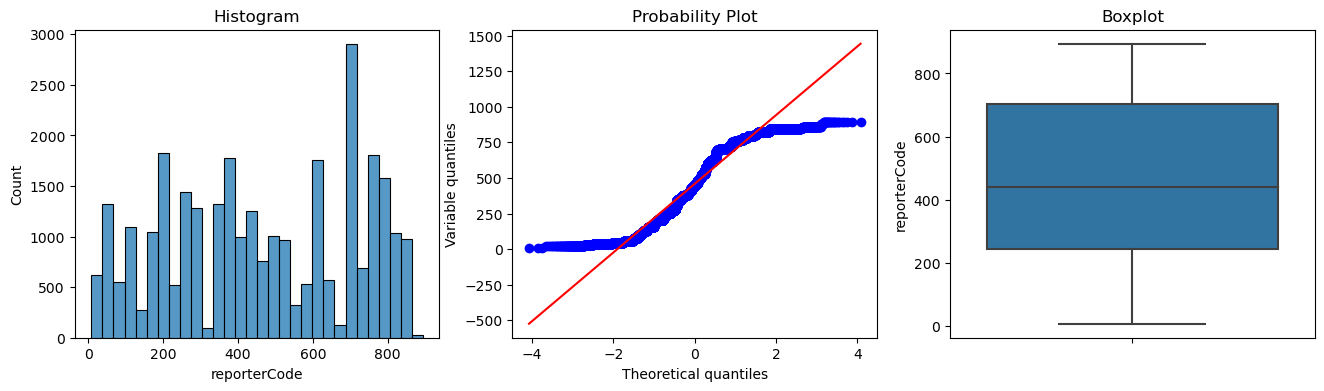

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


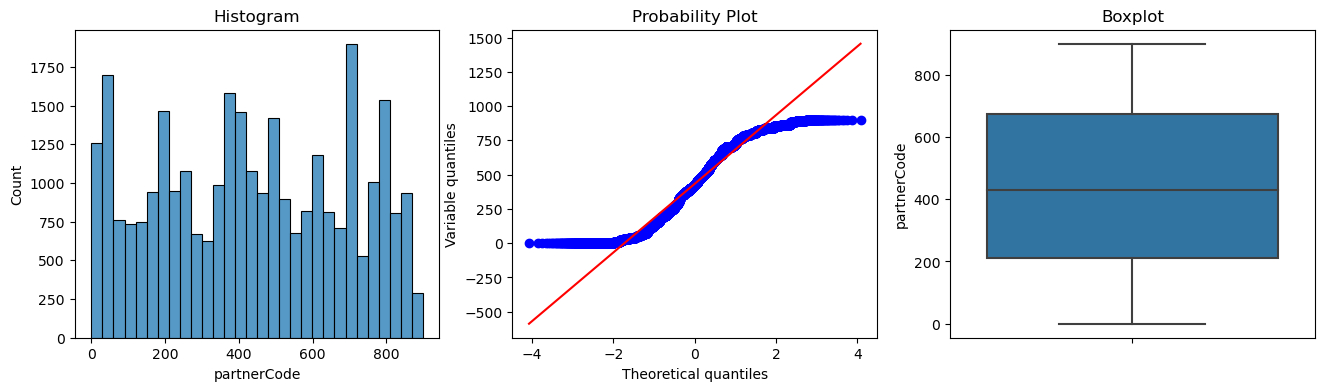

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


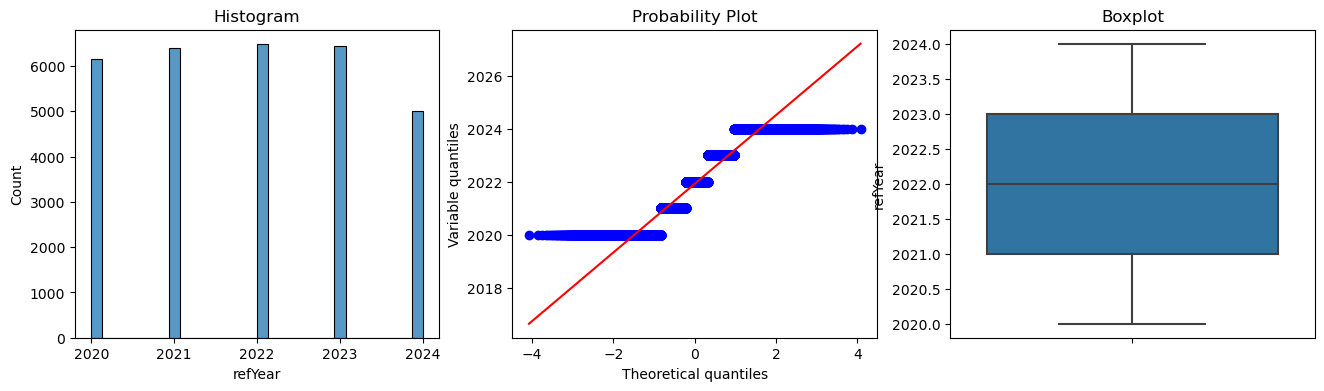

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


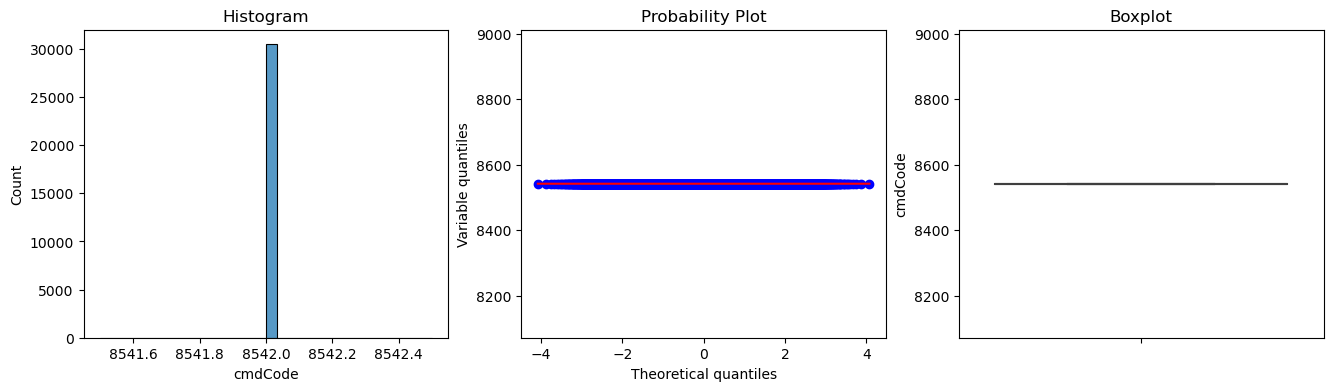

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


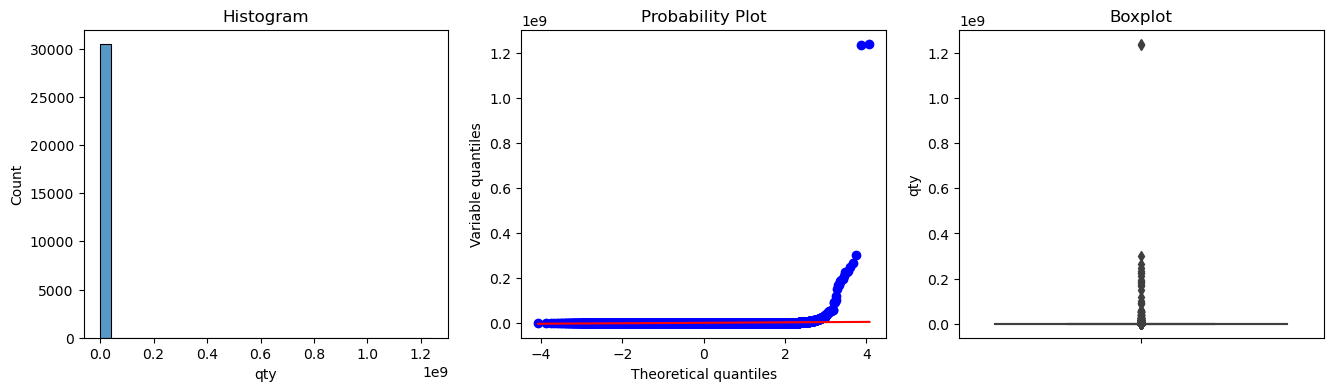

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


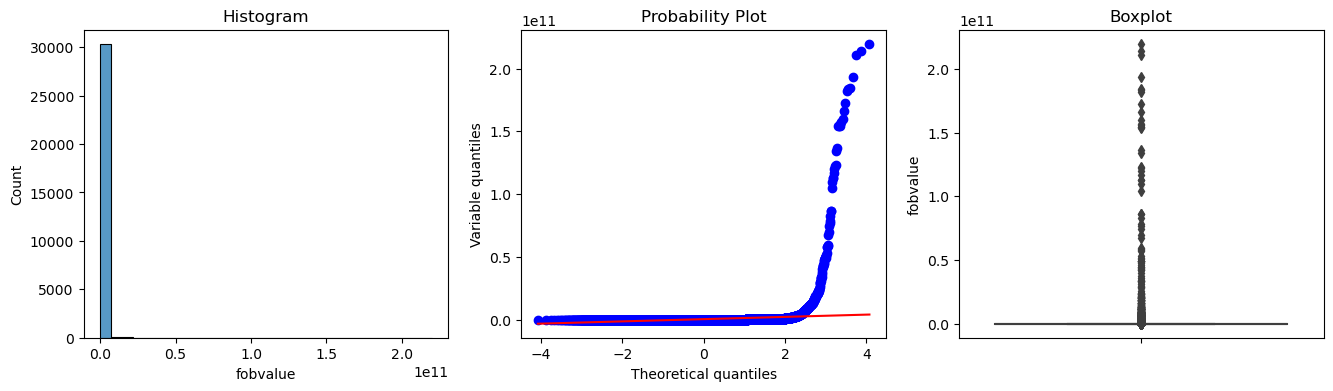

c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


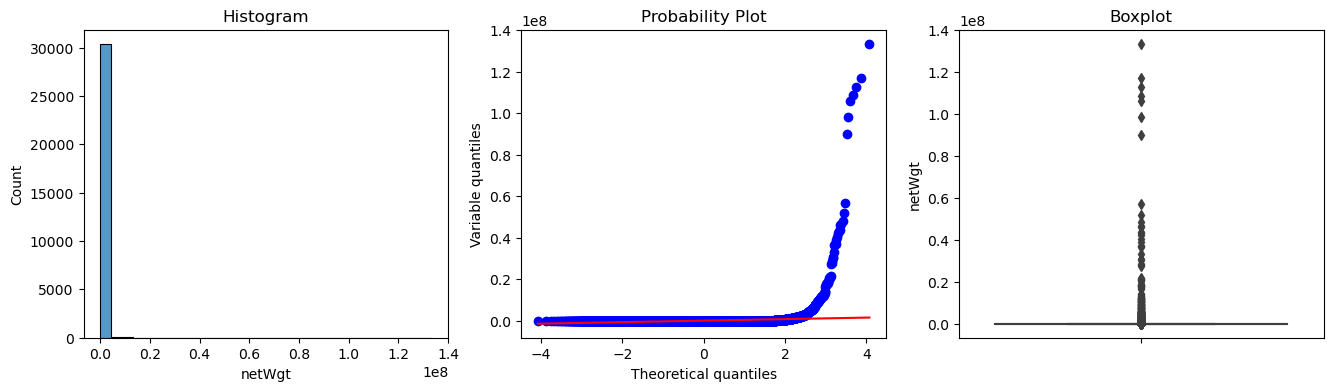

In [114]:
for col in numeric_df:
    check_plot(numeric_df, col)

There is nothing to conclude yet here.

In [115]:
top_countries = df_export.groupby('reporterDesc')['fobvalue'].sum().sort_values(ascending=False).reset_index()
top_countries.head(10)

,reporterDesc,fobvalue
0,"China, Hong Kong SAR",1.984351e+12
1,China,1.443633e+12
2,"Other Asia, nes",1.258378e+12
3,Rep. of Korea,1.022704e+12
4,Singapore,8.502060e+11
5,Malaysia,6.775516e+11
6,USA,4.856882e+11
7,Japan,3.196786e+11
8,Philippines,2.506551e+11
9,Germany,1.787982e+11


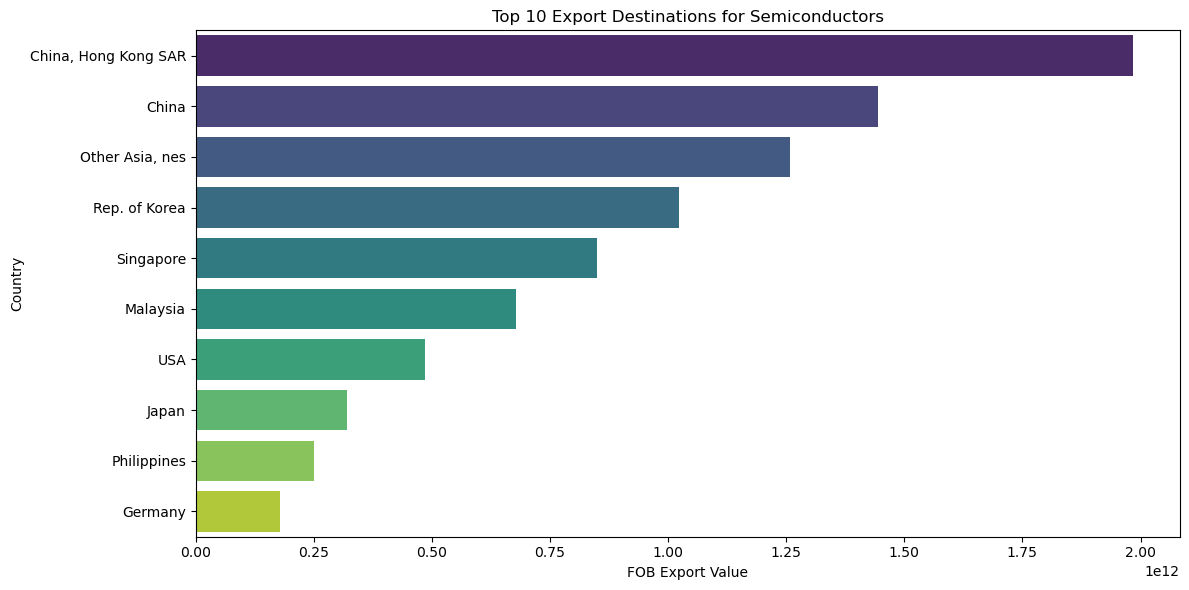

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_countries.head(10), x='fobvalue', y='reporterDesc', palette='viridis')
plt.title('Top 10 Export Destinations for Semiconductors')
plt.xlabel('FOB Export Value')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

<Axes: xlabel='refYear'>

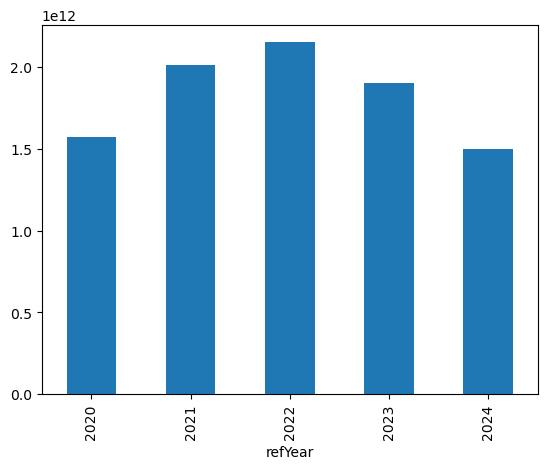

In [117]:
df_export.groupby(['refYear'])['fobvalue'].sum().plot(kind='bar')

In [118]:
# a. Trend analysis over time
trend_df = df_export.groupby("refYear")["fobvalue"].sum().reset_index()
trend_df

,refYear,fobvalue
0,2020,1.575342e+12
1,2021,2.014803e+12
2,2022,2.153318e+12
3,2023,1.902142e+12
4,2024,1.500373e+12


c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Admin\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


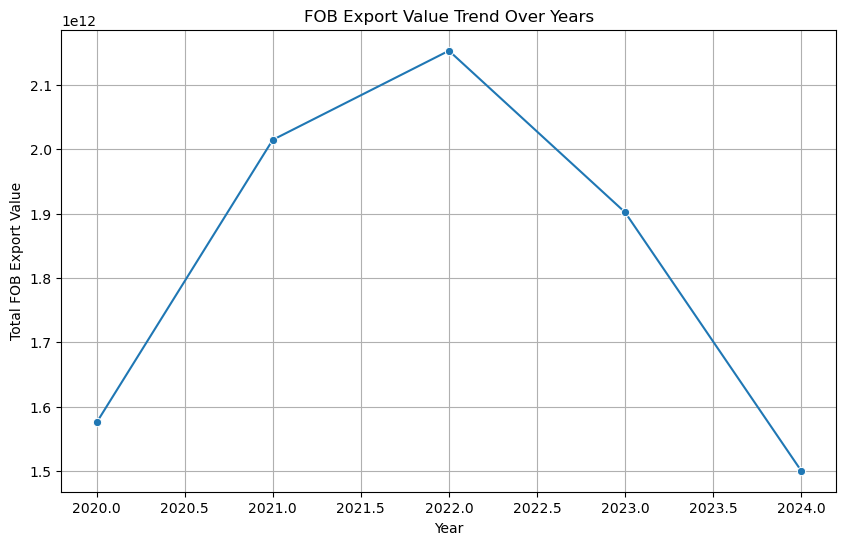

In [119]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=trend_df, x='refYear', y='fobvalue', marker='o')
plt.title('FOB Export Value Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Total FOB Export Value')
plt.grid(True)
plt.show()

In [120]:
# Calculate export value per kg
df_export["value_per_kg"] = df_export["fobvalue"] / df_export["netWgt"]

In [121]:
# b. Avg export value/kg by country
value_per_kg_df = df_export.groupby("reporterDesc")["value_per_kg"].mean().reset_index()
value_per_kg_df = value_per_kg_df.sort_values(by="value_per_kg", ascending=False).head(20)
value_per_kg_df

,reporterDesc,value_per_kg
34,"China, Hong Kong SAR",1.569266e+07
138,Singapore,9.754648e+06
95,Malaysia,6.654395e+06
80,Japan,4.156051e+06
155,USA,3.869947e+06
122,Philippines,3.254230e+06
163,Viet Nam,2.858711e+06
33,China,1.840424e+06
99,Mexico,1.453024e+06
149,Thailand,6.585843e+05


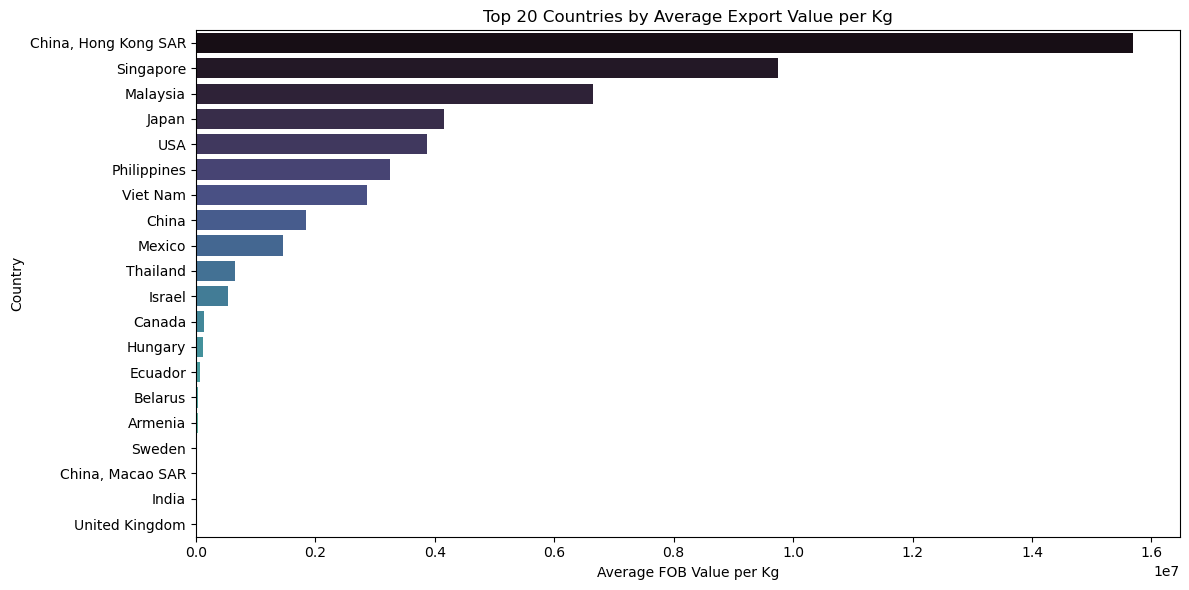

In [122]:
plt.figure(figsize=(12, 6))
sns.barplot(data=value_per_kg_df, x='value_per_kg', y='reporterDesc', palette='mako')
plt.title('Top 20 Countries by Average Export Value per Kg')
plt.xlabel('Average FOB Value per Kg')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [123]:
importer_value_per_kg_df = df_export.groupby("partnerDesc").agg(
    total_fobvalue=("fobvalue", "sum"),
    total_netwgt=("netWgt", "sum")
).reset_index()

In [124]:
# Calculate value per kg
importer_value_per_kg_df["value_per_kg"] = (
    importer_value_per_kg_df["total_fobvalue"] / importer_value_per_kg_df["total_netwgt"]
)
importer_value_per_kg_df = importer_value_per_kg_df.sort_values(by="value_per_kg", ascending=False).head(20)


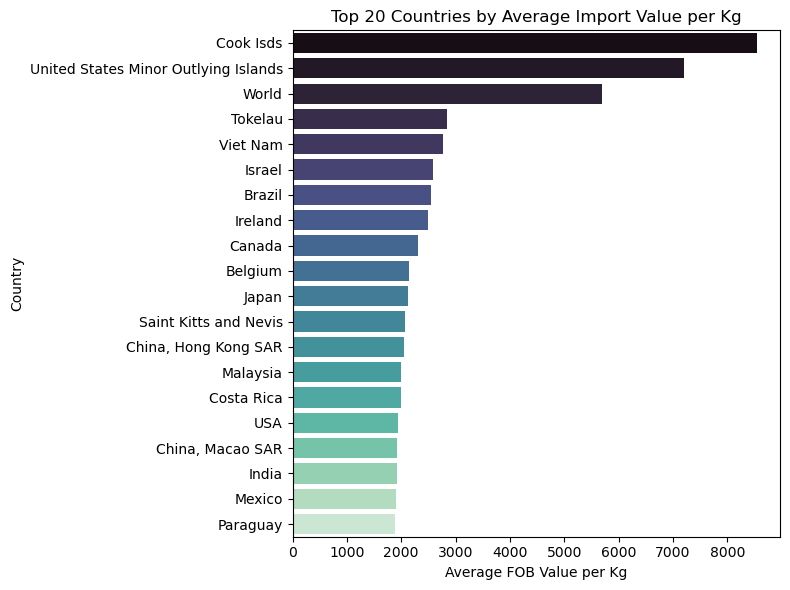

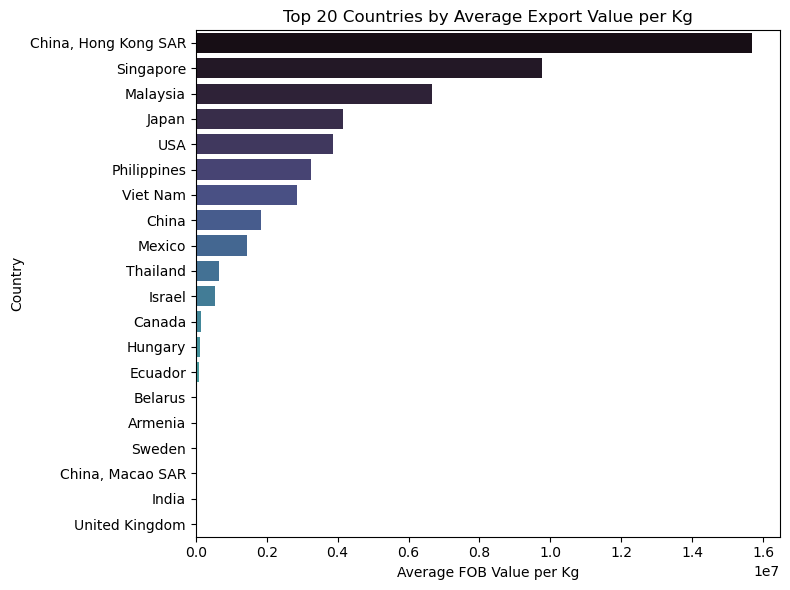

In [125]:
plt.figure(figsize=(8, 6))
sns.barplot(data=importer_value_per_kg_df, x='value_per_kg', y='partnerDesc', palette='mako')
plt.title('Top 20 Countries by Average Import Value per Kg')
plt.xlabel('Average FOB Value per Kg')
plt.ylabel('Country')
plt.tight_layout()

plt.figure(figsize=(8, 6))
sns.barplot(data=value_per_kg_df, x='value_per_kg', y='reporterDesc', palette='mako')
plt.title('Top 20 Countries by Average Export Value per Kg')
plt.xlabel('Average FOB Value per Kg')
plt.ylabel('Country')
plt.tight_layout()

plt.show()

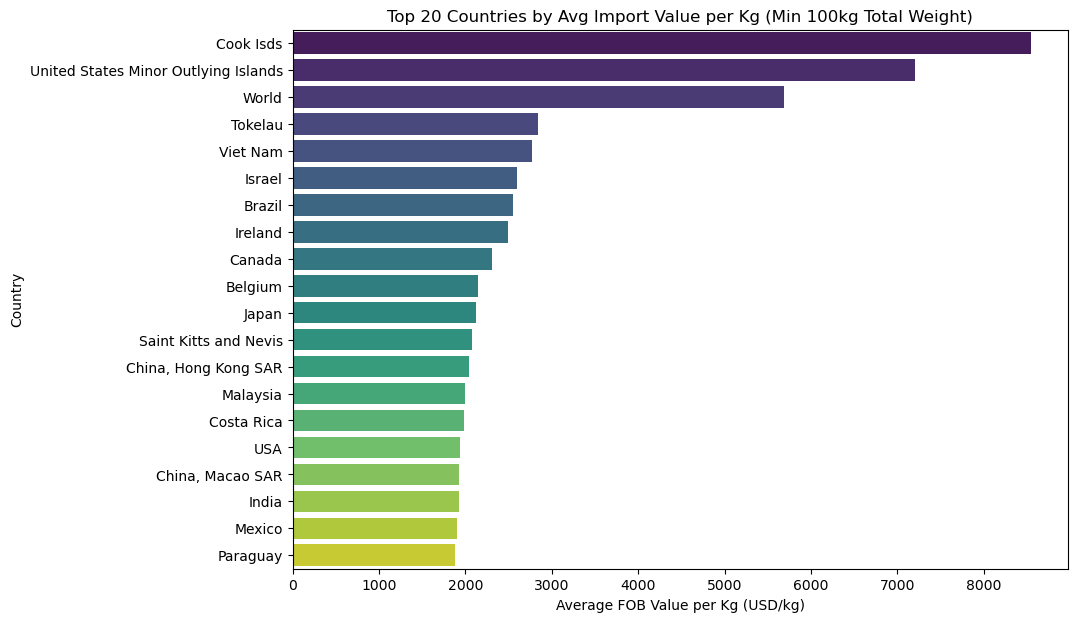

In [126]:
# Apply threshold: remove countries with too small total weight (e.g., <100kg)
filtered_df = importer_value_per_kg_df[importer_value_per_kg_df["total_netwgt"] > 100]

# Get top 20 by FOB value
top_importers_filtered = filtered_df.sort_values(by="value_per_kg", ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(data=top_importers_filtered, y="partnerDesc", x="value_per_kg", palette="viridis")
plt.title("Top 20 Countries by Avg Import Value per Kg (Min 100kg Total Weight)")
plt.xlabel("Average FOB Value per Kg (USD/kg)")
plt.ylabel("Country")
plt.show()


Move to PBI to make a complete visualization, and conclusion. Business recommendation is in Powerpoint.